<a href="https://colab.research.google.com/github/SatyaA-dev/SatyaAditya_INFO5731_Fall2024/blob/main/Masimukku_SatyaAditya_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic


In [ ]:
!pip install hdbscan
!pip install sentence-transformers


In [ ]:
import nltk
nltk.download('punkt')  # Redownload the full punkt tokenizer resource
nltk.download('stopwords')  # Redownload stopwords
nltk.download('wordnet')  # Redownload wordnet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt', force=True)  # Force redownload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import shutil
shutil.rmtree('/root/nltk_data/tokenizers/punkt', ignore_errors=True)  # Remove corrupted `punkt`
nltk.download('punkt')  # Redownload `punkt`


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.data.path.append('/custom/path')  # Use a directory with permissions
nltk.download('punkt', download_dir='/custom/path')


[nltk_data] Downloading package punkt to /custom/path...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install spacy
import spacy

# Load SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

# Tokenize text using SpaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

texts = texts.apply(preprocess_text_spacy)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords (if not done yet)
nltk.download('stopwords')

documents = pd.read_csv('/content/Cleaned_movie_reviews.csv')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize and remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

# Apply preprocessing to all documents
documents = [preprocess_text(doc) for doc in documents]

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Using top 1000 words
X = vectorizer.fit_transform(documents)

# Apply LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# Display the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("\n")

# Get feature names (words from the TF-IDF vectorizer)
feature_names = vectorizer.get_feature_names_out()

# Display top words for each topic
print_top_words(lda_model, feature_names, 10)


Topic #1:
review cleanedreview


Topic #2:
review cleanedreview


Topic #3:
review cleanedreview


Topic #4:
review cleanedreview


Topic #5:
cleanedreview review


Topic #6:
review cleanedreview


Topic #7:
review cleanedreview


Topic #8:
review cleanedreview


Topic #9:
review cleanedreview


Topic #10:
review cleanedreview




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
documents = pd.read_csv('/content/Cleaned_movie_reviews.csv')


# If the labels are not provided in the CSV, use your manual `labels` list for testing
if 'sentiment' in documents.columns:
    labels = documents['sentiment'].tolist()
else:
    labels = [1, 0, 1, 0, 2, 0, 1, 0, 2, 1]


documents = documents[:len(labels)]


if 'Cleaned_Review' in documents.columns:
    Cleaned_Review = documents['Cleaned_Review'].tolist()
else:
    raise ValueError("The 'Cleaned_Review' column is missing in the CSV file.")

# Debugging: Verify lengths
print(f"Number of documents: {len(Cleaned_Review)}")
print(f"Number of labels: {len(labels)}")

# Splitting the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(Cleaned_Review, labels, test_size=0.2, random_state=42)

# Feature Extraction: Using TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Unigrams and bigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC(kernel='linear')

# Using StratifiedKFold to ensure the class distribution is maintained
kf = StratifiedKFold(n_splits=3)  # Use 3 splits instead of 5 to avoid issues with class imbalance

# Cross-validation (3-fold)
log_reg_cv = cross_val_score(log_reg, X_train_tfidf, y_train, cv=kf, scoring='accuracy')
svm_cv = cross_val_score(svm, X_train_tfidf, y_train, cv=kf, scoring='accuracy')

print(f"Logistic Regression Cross-validation Accuracy: {log_reg_cv.mean()}")
print(f"SVM Cross-validation Accuracy: {svm_cv.mean()}")

# Train the models
log_reg.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_tfidf)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate models on the test set
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression
accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg = evaluate_model(y_test, y_pred_log_reg)
print(f"Logistic Regression Test Accuracy: {accuracy_log_reg}")
print(f"Logistic Regression Precision: {precision_log_reg}")
print(f"Logistic Regression Recall: {recall_log_reg}")
print(f"Logistic Regression F1 Score: {f1_log_reg}")

# Evaluate SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")


Number of documents: 10
Number of labels: 10
Logistic Regression Cross-validation Accuracy: 0.38888888888888884
SVM Cross-validation Accuracy: 0.38888888888888884
Logistic Regression Test Accuracy: 0.0
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1 Score: 0.0
SVM Test Accuracy: 0.0
SVM Precision: 0.0
SVM Recall: 0.0
SVM F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Write your code here

import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

print(train_data.info())
print(train_data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

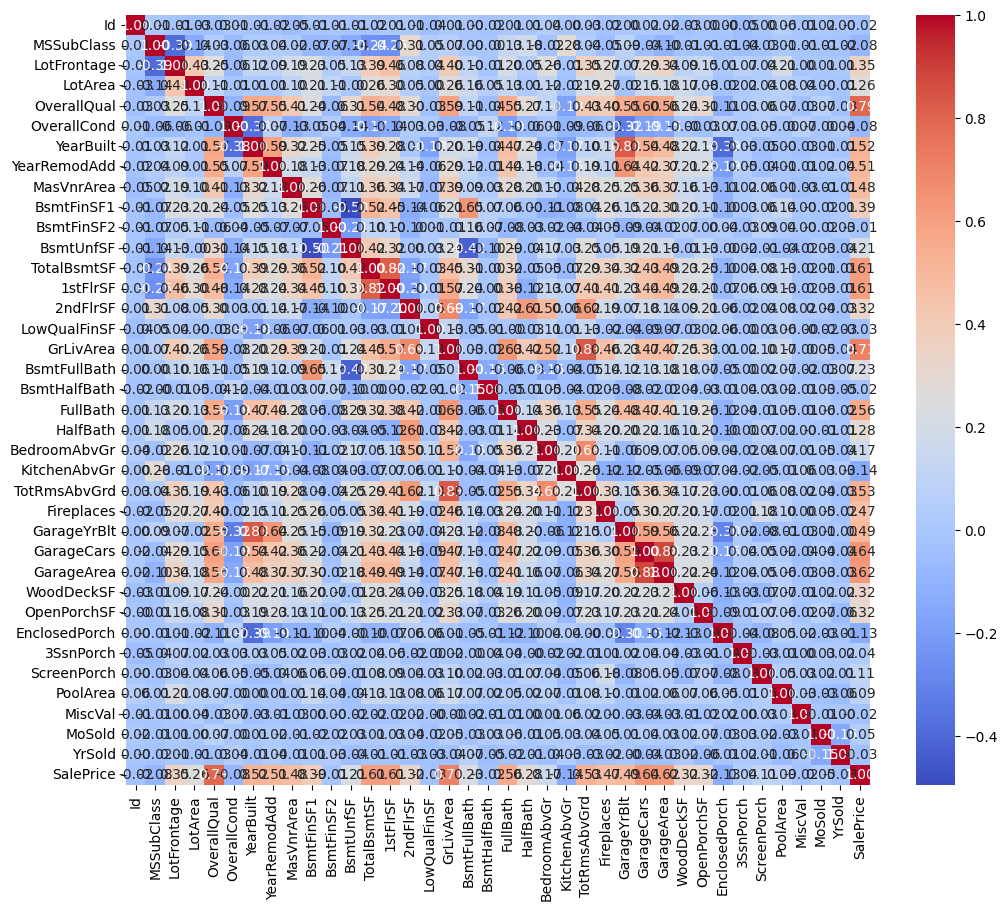

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number])

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [ ]:

numerical_columns = train_data.select_dtypes(include=[np.number]).columns
categorical_columns = train_data.select_dtypes(include=[object]).columns


train_data[numerical_columns] = train_data[numerical_columns].fillna(train_data[numerical_columns].median())


train_data[categorical_columns] = train_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


print(train_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [ ]:
train_data = pd.get_dummies(train_data, drop_first=True)
print(train_data.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  SaleType_ConLw  \
0          2003       196.0         706  ...           False           False   
1          1976         0.0         978  ...           False           False   
2          2002       162.0         486  ...           False           False   
3          1970         0.0         216  ...           False           False   
4          2000       350.0         655  ...           False           False   

   SaleType_New  SaleType_Oth  SaleTyp

In [ ]:
# Selecting a subset of features for the model
features = ['OverallQual', 'GrLivArea', 'TotRmsAbvGrd', 'YearBuilt', '1stFlrSF', 'GarageCars']
target = 'SalePrice'

X_train = train_data[features]
y_train = train_data[target]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train-test split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 25792.945294324036
Mean Squared Error (MSE): 1629033626.9299982
R-squared (R²): 0.7876187292525333


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
RoBERTa, which stands for Robustly Optimized BERT Approach, is a transformer-based language model that builds on BERT with several optimizations to enhance performance. It was pretrained on a vast corpus of 160GB of uncompressed text data, including Common Crawl News, OpenWebText, and BooksCorpus, among other sources. The model comes in different configurations, with the base model having approximately 125 million parameters and the large model containing about 355 million parameters. While RoBERTa is commonly fine-tuned for specific tasks like sentiment analysis, it also performs well in zero-shot settings, making it a versatile choice for various text classification applications.

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/Cleaned_movie_reviews.csv')

# Ensure your dataset contains a sentiment column with values 0, 1, 2
# This might be the column where you store the sentiment labels (make sure the column name matches)
groundtruth_labels = data['sentiment']  # Example column for sentiment labels

# Map numeric labels to textual sentiment labels
groundtruth_labels = groundtruth_labels.map({0: 'negative', 1: 'positive', 2: 'neutral'})

# Now groundtruth_labels should have the correct sentiment text values
print(groundtruth_labels.head())  # Verify the mapping works correctly

# Proceed with your model prediction steps
# Make sure the predicted labels are in the same format as the groundtruth_labels
predicted_labels = []

for i in range(0, len(documents), batch_size):
    batch = documents[i:i + batch_size]

    # Get predictions for the current batch
    results = classifier(batch, candidate_labels)

    # Extract the top predicted labels from the results
    for result in results:
        predicted_label = candidate_labels.index(result["labels"][0])  # Get the index of the predicted label
        predicted_labels.append(predicted_label)

    print(f"Processed {i + len(batch)}/{len(documents)} documents.")  # Progress log for every batch

# Ensure groundtruth_labels are available (e.g., manually label a small subset)
# groundtruth_labels = [0, 1, 2, 0, 1, 1, 0, 2, ...]

# Evaluate performance (only if you have the ground truth labels)
if len(groundtruth_labels) == len(predicted_labels):
    accuracy = accuracy_score(groundtruth_labels, predicted_labels)
    precision = precision_score(groundtruth_labels, predicted_labels, average="weighted")
    recall = recall_score(groundtruth_labels, predicted_labels, average="weighted")
    f1 = f1_score(groundtruth_labels, predicted_labels, average="weighted")

    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
else:
    print("The lengths of groundtruth labels and predicted labels don't match.")


KeyError: 'sentiment'

In [ ]:
RoBERTa offers several advantages, including robust pretraining on a large and diverse corpus, which enhances its generalization capabilities. It performs well in zero-shot settings, making it suitable for tasks like sentiment analysis without requiring task-specific fine-tuning. Additionally, it achieves state-of-the-art results on various benchmarks. However, RoBERTa also has disadvantages, such as being computationally intensive, especially for larger models, and being limited to processing text lengths of up to 512 tokens in the base model. Moreover, its performance in zero-shot classification can vary and may underperform compared to fine-tuned models for specific datasets. During implementation, challenges included mapping the zero-shot model's predicted labels (e.g., "positive") to groundtruth labels (e.g., 1, 0, 2) and dealing with the model's difficulty in accurately classifying neutral sentiments without fine-tuning. Additionally, larger models like bart-large-mnli introduced runtime overhead, with slower inference times compared to smaller alternatives like DistilBERT.